# California Housing Prices

## Dataset

In this homework, we will use the California Housing Prices data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices), which can be download from the mlzoomcamp repo: https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv.

We'll keep working with the `median_house_value` variable, and we'll transform it to a classification task.

Let's download the data and read it in pandas dataframe:

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
if not os.path.isfile('housing.csv'):
    !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [3]:
# Load the data
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Check the number of rows and columns in df
df.shape

(20640, 10)

## Features

The available features in our dataframe are:

- `longitude`: A measure of how far west a house is; a higher value is farther west
- `latitude`: A measure of how far north a house is; a higher value is farther north
- `housing_median_age`: Median age of a house within a block; a lower number is a newer building
- `total_rooms`: Total number of rooms within a block
- `total_bedrooms`: Total number of bedrooms within a block
- `population`: Total number of people residing within a block
- `households`: Total number of households, a group of people residing within a home unit, for a block
- `median_income`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- `median_house_value`: Median house value for households within a block (measured in US Dollars)
- `ocean_proximity`: Location of the house w.r.t ocean/sea

## Data Preparation

- Find the missing values in the above features and fill with 0
- Create a new column `rooms_per_household` by dividing the `total_rooms` by the column `households` from dataframe
- Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe
- Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe

In [5]:
# Check for missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# Fill missing values with 0
df.total_bedrooms = df.total_bedrooms.fillna(0)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
# Create new column 'rooms_per_household' by dividing 'total_rooms' and 'households' columns
df['rooms_per_household'] = df.total_rooms / df.households

In [8]:
# Create new column 'bedrooms_per_room' by dividing 'total_bedrooms' and 'total_rooms' columns
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms

In [9]:
# Create new column 'population_per_household' by dividing 'population' and 'households' columns
df['population_per_household'] = df.population / df.households

# Display results
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [10]:
# Check shape again
df.shape

(20640, 13)

### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:

- `NEAR BAY`
- `<1H OCEAN`
- `INLAND`
- `NEAR OCEAN`

In [11]:
# Most frequent value in 'ocean_proximity'
df.ocean_proximity.mode().values[0]

'<1H OCEAN'

## Split the data

- Split the data in train/val/test sets, with 60%/20%/20% distribution
- Use Scikit-Learn `train_test_split` function to split the data and set the seed to 42
- Make sure that the target value `median_house_value` is not in your dataframe

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Split the data to create train/val/test sets with 60%/20%/20% distribution
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Create validation set from 'df_train_full'
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [14]:
# Reset indexes
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [15]:
# Create target variable for train/val/test
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [16]:
# Drop 'median_house_value' from feature columns
df_train = df_train.drop(columns='median_house_value')
df_val = df_val.drop(columns='median_house_value')
df_test = df_test.drop(columns='median_house_value')

In [17]:
# Shape of the tree datasets
df_train.shape, df_val.shape, df_test.shape

((12384, 12), (4128, 12), (4128, 12))

### Question 2

- Create the correlation matrix for the numerical features of your train dataset
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset
- What are the two features that have the biggest correlation in this dataset?

Options:

- `total_bedrooms` and `households`
- `total_bedrooms` and `total_rooms`
- `population` and `households`
- `population_per_household` and `total_rooms`

### Make `median_house_value` Binary

- We need to turn the `median_house_value` variable from numeric to binary
- Let's create a variable `above_averge` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

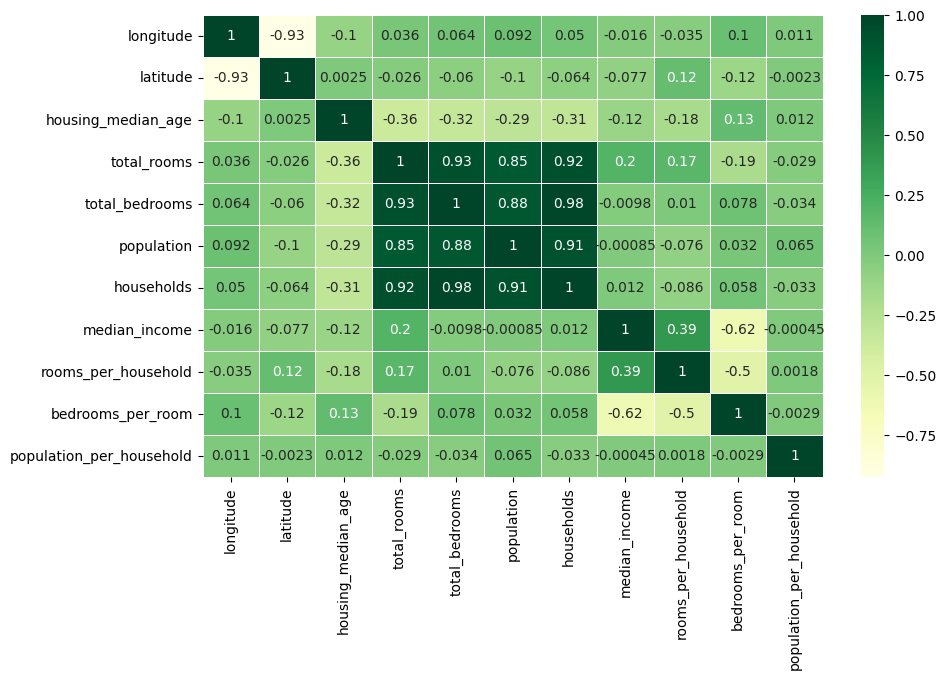

In [18]:
# Draw correlation matrix of numerical features of train dataset
plt.figure(figsize=(10, 6))
corr = df_train.corr()
sns.heatmap(corr, annot=True, cmap='YlGn', linewidths=.5)
plt.show();

`total_bedrooms` and `households` have the strong positive correlation (0.98).

In the next step, we'll convert our target variable `median_house_value` from numeric to binary and store the values in a variable `above_average`.

In [19]:
above_average = (y_train >= y_train.mean()).astype(int)
above_average

array([1, 1, 0, ..., 1, 0, 0])

### Question 3

- Caculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only
- What is the value of mutual information?
- Round it to 2 decimal digits using `round(score, 2)`

Options:

- 0.26
- 0
- 0.10
- 0.16

In [20]:
from sklearn.metrics import mutual_info_score
score = mutual_info_score(above_average, df_train.ocean_proximity)
round(score, 2)

0.1

### Question 4

- Now let's train a logistic regression
- Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding
- Fit the model on the training dataset:
    - To make sure the results are reproducible across different version of Scikit-Learn, fit the model with these parameters; `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
    - Calculate the accuracy on the validation dataset and round it to 2 decimal digits
    
Options:

- 0.60
- 0.72
- 0.84
- 0.95

In [21]:
from sklearn.feature_extraction import DictVectorizer

In [22]:
# Apply DictVectorizer on 'df_train'
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [23]:
# Apply DictVectorizer on 'df_val'
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

# Convert 'y_val' from numeric to binary
above_average_val = (y_val >= y_val.mean()).astype(int)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
# Fit the model (using specified parameters)
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, above_average)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [26]:
# Make predictions
y_pred = model.predict(X_val)

In [27]:
from sklearn.metrics import accuracy_score

# Evaluate model accuracy
score = accuracy_score(above_average_val, y_pred)
accuracy = round(score, 2)
accuracy

0.84

### Question 5

- Let's find the least useful feature using the *feature elimination* technique
- Train a model with all these features (using the same parameters as in Q4)
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature
- Which of the following feature has the smallest difference?
    - `total_rooms`
    - `total_bedrooms`
    - `population`
    - `households`
    
> **note**: the difference doesn't have to be positive

In [28]:
# Make copies of 'df_train' and 'df_val'
df_train2 = df_train.copy()
df_val2 = df_val.copy()

# Assign 'df_train' columns in the variable 'features'
features = df_train.columns.tolist()

# Assign 'accuracy' from Q4 to the variable 'original_score'
original_score = accuracy

# Lists to store column names, accuracy difference, and accuracy
cols_list = []
acc_diff = []
acc = []

for col in features:
    subset = features.copy() # make copy to ensure first feature is being removed after every iteration
    subset.remove(col)
    
    # DictVectorized train set
    train_dict = df_train2[subset].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    
    # DictVectorized validation set
    val_dict = df_val2[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    # Train model
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, above_average)
    
    # Make predictions
    y_pred = model.predict(X_val)
    
    # Evaluate model
    score = accuracy_score(above_average_val, y_pred)
    
    # Store values to respectively lists
    cols_list.append(col)
    acc_diff.append(original_score - score)
    acc.append(score)

In [29]:
# Create dataframe to compare least useful features
df_features = pd.DataFrame(list(zip(cols_list, acc_diff, acc)), columns=['feature', 'accuracy_difference', 'accuracy'])
df_features.sort_values(by='accuracy_difference')

,feature,accuracy_difference,accuracy
3,total_rooms,0.001337,0.838663
11,population_per_household,0.002548,0.837452
9,rooms_per_household,0.003033,0.836967
4,total_bedrooms,0.003517,0.836483
10,bedrooms_per_room,0.003517,0.836483
0,longitude,0.004244,0.835756
1,latitude,0.005455,0.834545
6,households,0.007151,0.832849
2,housing_median_age,0.009816,0.830184
5,population,0.012481,0.827519


We see the feature `total_rooms` has the smallest difference in terms of accuracy which is `0.001337`, where the model achieved around `0.84` of total accuracy.

### Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column `median_house_value`. Apply the logarithmic transformation to this column
- Fit the Ridge regression model `model = Ridge(alpha=a, solver="sag", random_state=42)` on the training data
- This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
- Which of these alpha value leads to the best RMSE on the validation set? Round the RMSE scores to 3 decimal digits.

If there are mulitple options, select the smallest `alpha`.

Options:

- 0
- 0.01
- 0.1
- 1
- 10

In [30]:
# Apply log transformation on 'y_train' and 'y_val'
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alpha_values = []
rmse_scores = []

for a in [0, 0.01, 0.1, 1, 10]:
    # Create model
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)

    # Make predicitons
    y_pred = model.predict(X_val)

    # Model evaluations
    rmse = np.round(mean_squared_error(y_val, y_pred, squared=False), 3)
    
    # Apend values in respective lists
    alpha_values.append(a)
    rmse_scores.append(rmse)

print('All done!')

All done!


In [32]:
# Create dataframe to compare scores
df_rmse = pd.DataFrame(list(zip(alpha_values, rmse_scores)), columns=['alpha', 'rmse'])
df_rmse

,alpha,rmse
0,0.00,0.525
1,0.01,0.525
2,0.10,0.525
3,1.00,0.525
4,10.00,0.525


All the rmse scores are same. Hence the smallest alpha would be `0` in this case.